In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from Module_WalshPSeq import *
from Part_2A import normalizeWF, initialVals
import matplotlib.pyplot as plt

##### Here an example for XX+YY Long-range interacting Hamiltonians is demonstrated to decouple these interactions using Walsh Pulse sequences. 
##### Plot of Log(|1 - F|) vs Time is plotted for different values of tau (this is the time period after which the pulse sequences are repeated upto Time T). 

In [26]:
params = {
'N' : 1,
'tau_list':[1, 0.5, 0.1, 0.05],
'tau': 0.1,
'n': 2,
'alpha': 1,
'T': 10,
    'R': [],
    'r': [],
    'alpha': 1,
'opH': [X, Y], # Need to change this specific to Model
'pulses': [I, Z] # Need to change this specific to Model
}

In [27]:
W_x, W_y = [1, 2, 3], [1, 2, 3]
params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
params['N'] = len(W_x)
params['n'] = len(params['pulses'])
params['opH'] = [X, Y] 
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
params['R'], params['r'], params['alpha'] = R, r, 2

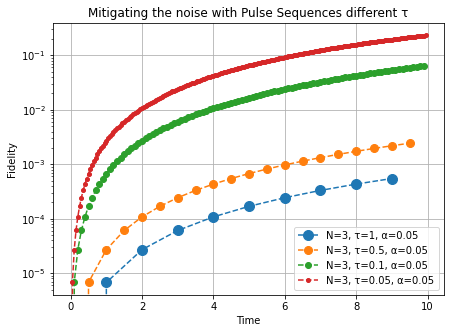

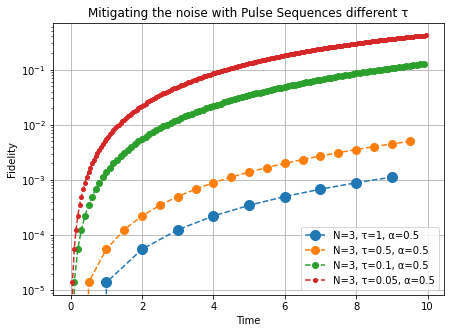

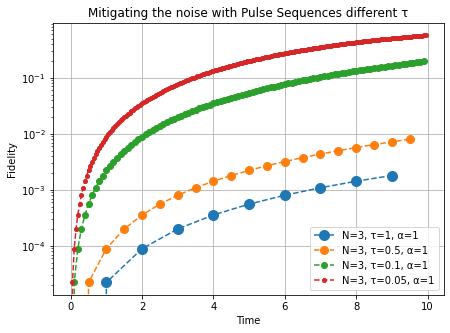

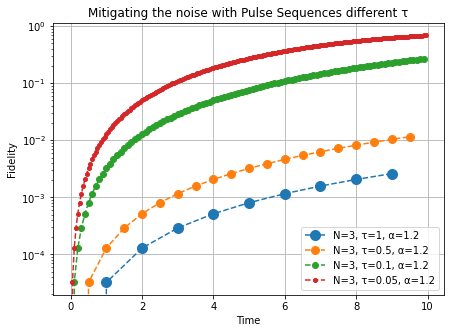

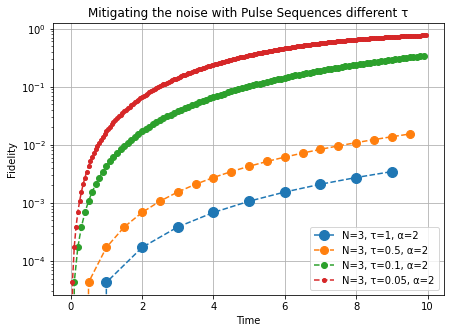

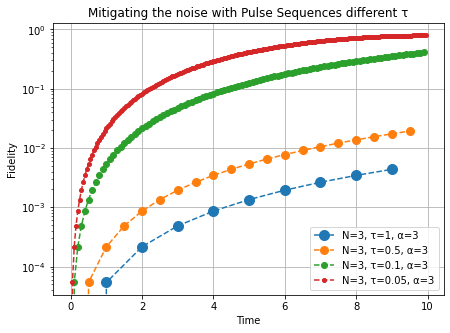

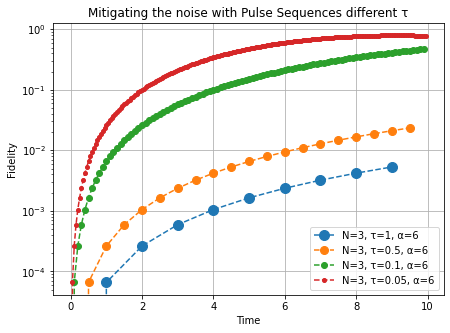

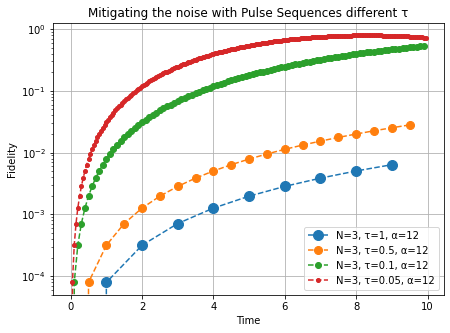

In [28]:
Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
params['n'], tau_n_list = len(Pseq), []
for alpha in [0.05, 0.5, 1, 1.2, 2, 3, 6, 12]:
    params['alpha'] = alpha
    Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
    for k, p in enumerate(Pseq):
        timeOpPHrP = np.linalg.inv(p)@expH_r@p@timeOpPHrP
    t_list = np.arange(0, params['T'], params['tau'])
    unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]

    mss = 10

    plt.figure(figsize=[7,5])
    for tau in params['tau_list']:
        params['tau'] = tau
        F = []
    #     uOp, t = WPSeq_TimeEvolOp(params)
        alphaf = params['alpha']
        t = np.arange(0, params['T'], params['tau'])
        uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, _ in enumerate(t)]
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
        mss -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        plt.title("Mitigating the noise with Pulse Sequences different τ")
        plt.grid('on')
    plt.show()